In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('D:\\Data Sets Practice\\mediacompany.csv')

In [3]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,03-01-2017,183738,1260228,1706478,1060860448,0,0
1,03-02-2017,193763,1270561,1690727,1031846645,0,0
2,03-03-2017,210479,1248183,1726157,1010867575,0,0
3,03-04-2017,240061,1492913,1855353,1079194579,1,0
4,03-05-2017,446314,1594712,2041418,1357736987,0,0


In [4]:
data['Date']= pd.to_datetime(data['Date'])

In [5]:
delta=pd.to_datetime('2017-02-28')
data['days']= data['Date']-delta

In [6]:
data['days']=data['days'].astype(str)
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days 00:00:00.000000000
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days 00:00:00.000000000
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days 00:00:00.000000000
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days 00:00:00.000000000
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days 00:00:00.000000000


In [7]:
data1 = (data['days'].str.extract(r'(?P<Name>.*?)(?P<day>\d+(?:\.\d+)?)')
                 .applymap(str.strip))

In [8]:
data['day']= data1['day']

In [9]:
data.drop(columns='days',inplace= True)

In [10]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


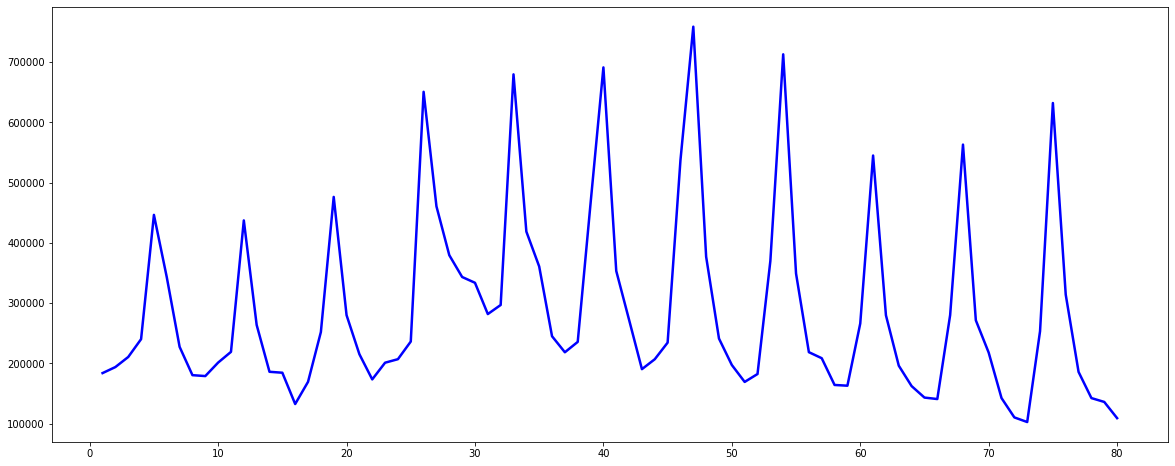

In [11]:
c = [i for i in range(1,81,1)]         # generating index 
fig = plt.figure(figsize=(20,8))
plt.plot(c,data['Views_show'], color="blue", linewidth=2.5, linestyle="-")

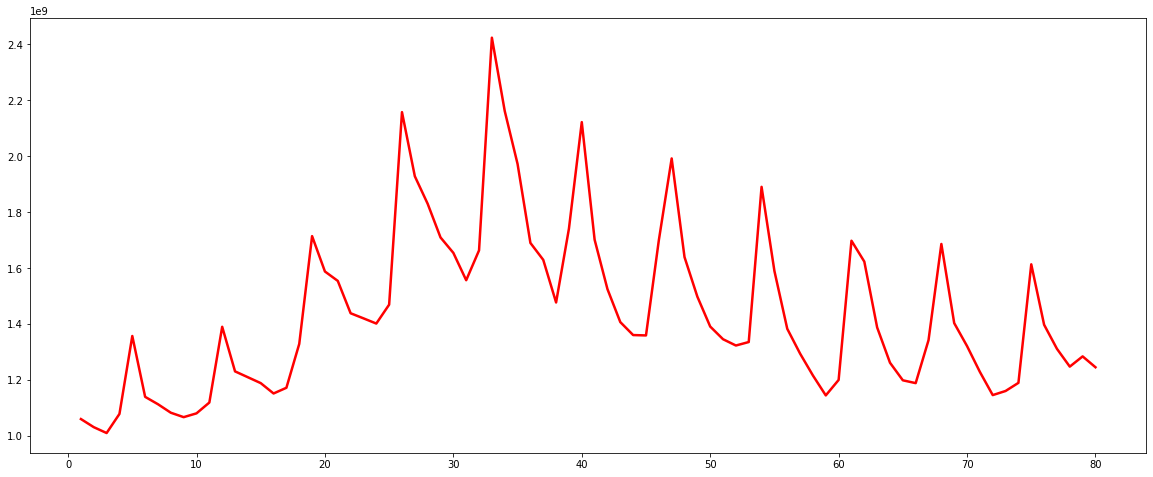

In [12]:
c = [i for i in range(1,81,1)]         # generating index 
fig = plt.figure(figsize=(20,8))
plt.plot(c,data['Ad_impression'], color="red",  linewidth=2.5, linestyle="-")

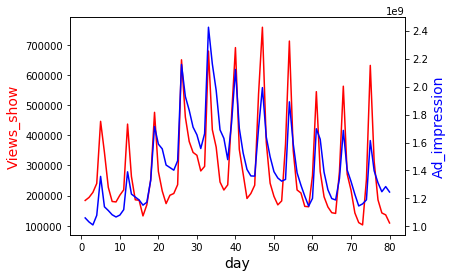

<Figure size 1440x576 with 0 Axes>

In [13]:
# create figure and axis objects with subplots()

fig,ax = plt.subplots()
fig = plt.figure(figsize=(20,8))
# make a plot
ax.plot(c,data['Views_show'], color="red")
# set x-axis label
ax.set_xlabel("day",fontsize=14)
# set y-axis label
ax.set_ylabel("Views_show",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(c,data['Ad_impression'],color="blue")
ax2.set_ylabel("Ad_impression",color="blue",fontsize=14)
plt.show()

In [14]:
data['weekday'] = data['Date'].dt.day_name()

In [15]:
data['weekday']= data['weekday'].replace(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],[1,2,3,4,5,6,7])

In [16]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


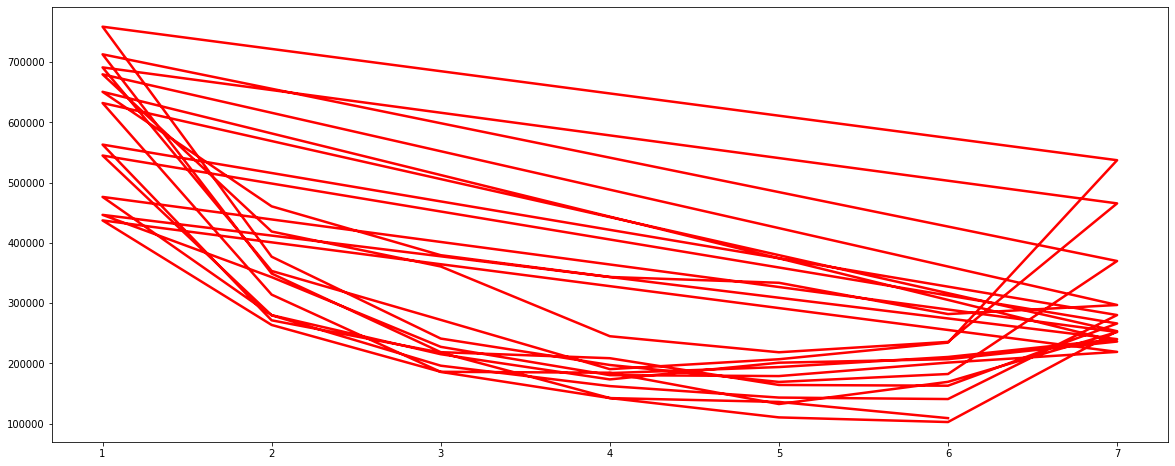

In [17]:
c = [i for i in range(1,81,1)]         # generating index 
fig = plt.figure(figsize=(20,8))
plt.plot(data['weekday'],data['Views_show'], color="red",  linewidth=2.5, linestyle="-")

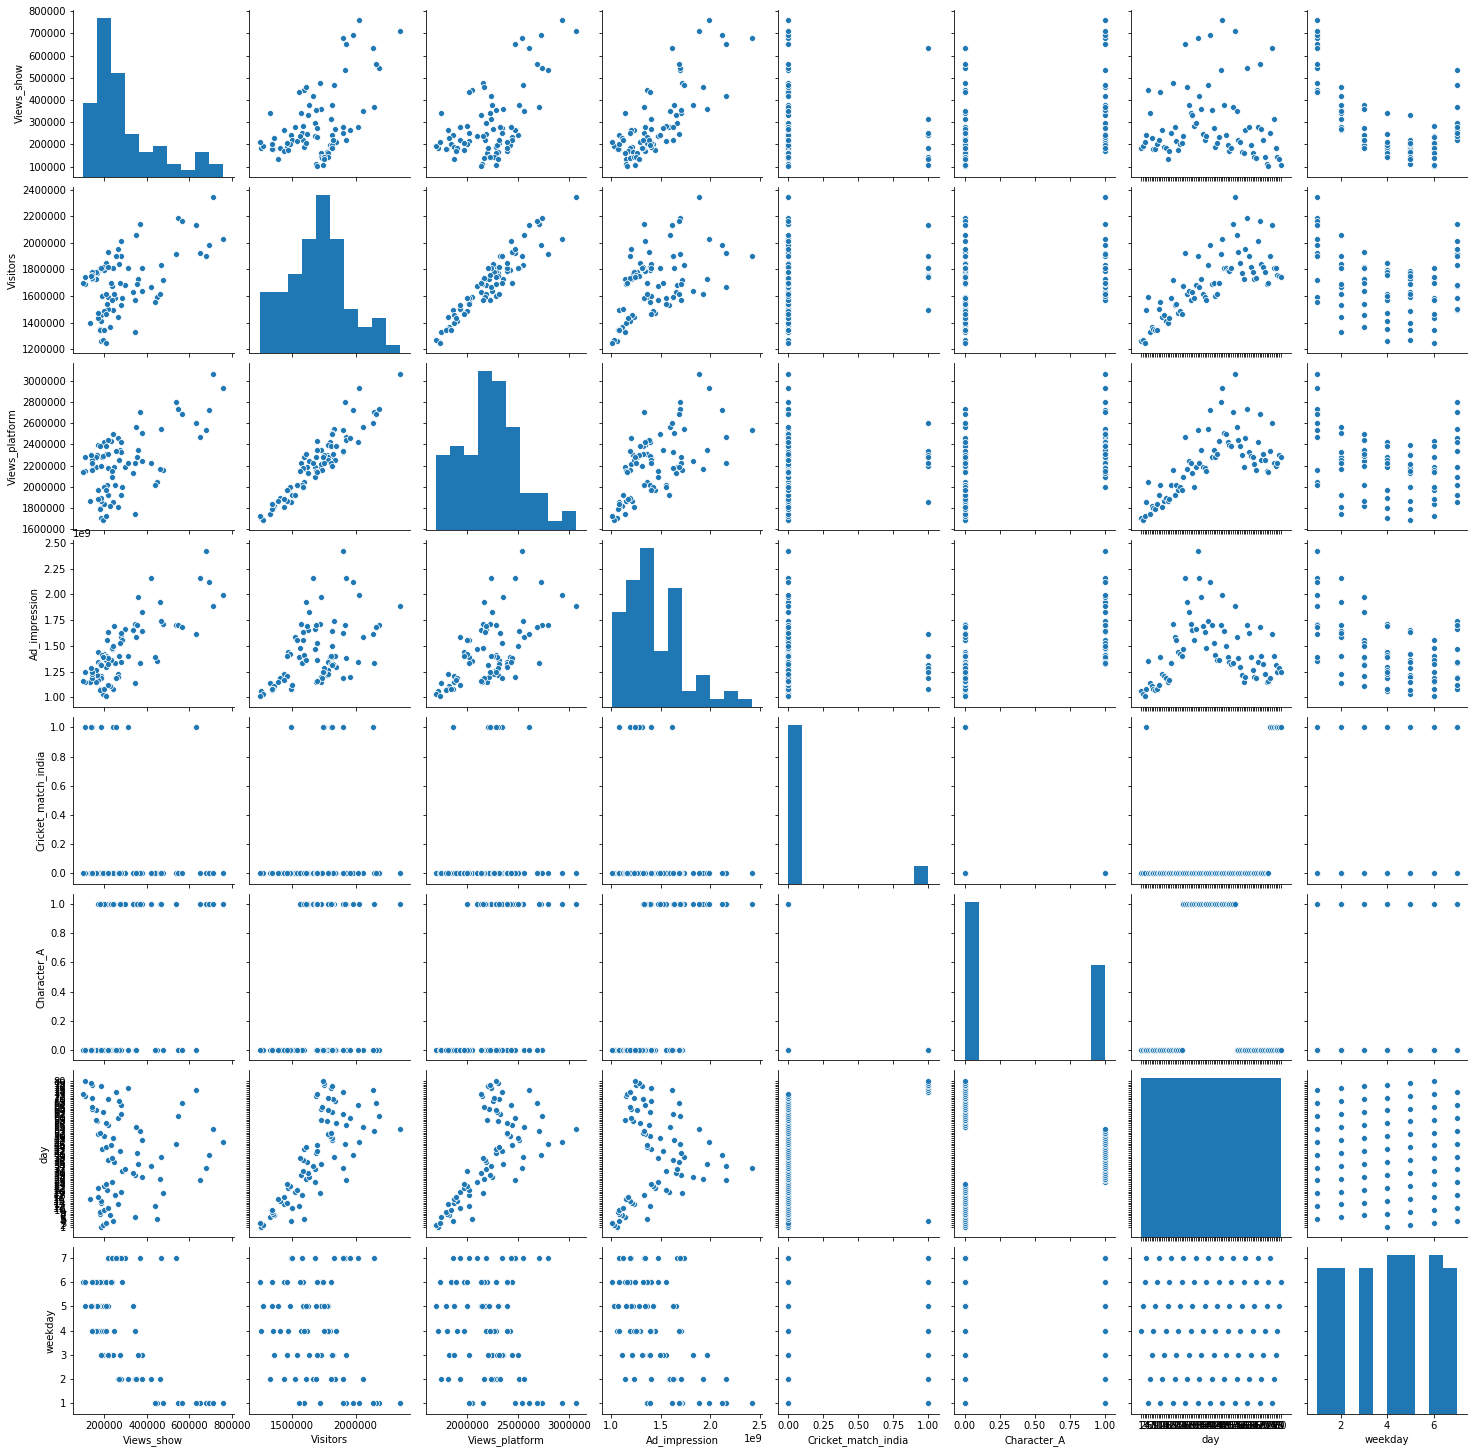

In [18]:
sns.pairplot(data)

In [19]:
len(data)

80

In [20]:
# IQr1= data.quantile(0.25)
# IQr2= data.quantile(0.75)

# IQR = IQr2-IQr1

# data1=data[~((data > (IQr2+1.5*IQR) | (data < (IQr1-1.5*IQR)).any(axis=1)))]

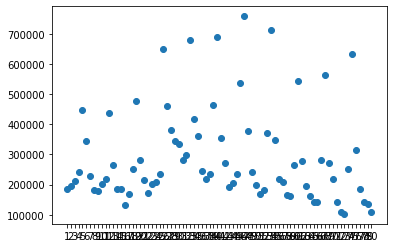

In [21]:
plt.scatter(data['day'], data['Views_show'])

In [22]:
x= data[['Visitors', 'Views_platform']]
y= data['Views_show']

In [23]:
#60,20

train_x= x.iloc[:60,]
test_x= x.iloc[60:,]

train_y=y.iloc[:60,]
test_y= y.iloc[60:,]

In [24]:
# Using the Linear Regression Model
from sklearn.linear_model import LinearRegression

In [25]:
lm= LinearRegression()

lm.fit(train_x,train_y) #in LR take X, Y in order

pred= lm.predict(train_x)

future= lm.predict(test_x)

In [26]:
print(lm.coef_,lm.intercept_)

[0.00861674 0.30006609] -366920.83187360497


In [27]:
print(mean_squared_error(pred,train_y), r2_score(pred,train_y))
print(mean_squared_error(future,test_y), r2_score(future,test_y))

13628714787.557398 -0.4753951186860266
21888036153.157375 -7.594625942142899


In [28]:
#Using OLS

In [29]:
import statsmodels.api as sm

X_train= sm.add_constant(train_x)# constant to be added in SM inorder to take intercept
mod= sm.OLS(train_y,X_train).fit() #in SM its Y,X whereas in LR its X,Y in order

In [30]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     19.32
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           3.94e-07
Time:                        13:22:55   Log-Likelihood:                -785.20
No. Observations:                  60   AIC:                             1576.
Df Residuals:                      57   BIC:                             1583.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.669e+05   1.13e+05     -3.

In [31]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#Calculating the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
checkVIF(train_x)

,Features,VIF
0,Visitors,551.06
1,Views_platform,551.06


In [32]:
x= data[['Visitors', 'weekday']]
y= data['Views_show']

In [33]:
#60,20

train_x= x.iloc[:60,]
test_x= x.iloc[60:,]

train_y=y.iloc[:60,]
test_y= y.iloc[60:,]

In [34]:
lm= LinearRegression()

lm.fit(train_x,train_y) #in LR take X, Y in order

pred= lm.predict(train_x)

future= lm.predict(test_x)

In [35]:
print(lm.coef_,lm.intercept_)

[ 3.42519159e-01 -3.40687356e+04] -120129.55254111002


In [36]:
print(mean_squared_error(pred,train_y), r2_score(pred,train_y))
print(mean_squared_error(future,test_y), r2_score(future,test_y))

10018965619.339167 0.22013682652033495
24295160268.329746 -1.282997882988997


In [37]:
import statsmodels.api as sm

X_train= sm.add_constant(train_x)# constant to be added in SM inorder to take intercept
mod= sm.OLS(train_y,X_train).fit() #in SM its Y,X whereas in LR its X,Y in order

In [38]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     36.54
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           6.12e-11
Time:                        13:22:55   Log-Likelihood:                -775.97
No. Observations:                  60   AIC:                             1558.
Df Residuals:                      57   BIC:                             1564.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.201e+05   1.08e+05     -1.117      0.2

In [39]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#Calculating the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
checkVIF(train_x)

,Features,VIF
0,Visitors,4.4
1,weekday,4.4


In [40]:
data.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'day', 'weekday'],
      dtype='object')

In [60]:
x= data[['Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'day', 'weekday']]
y= data['Views_show']

In [61]:
data.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
day                             int64
weekday                         int64
dtype: object

In [42]:
#60,20

train_x= x.iloc[:60,]
test_x= x.iloc[60:,]

train_y=y.iloc[:60,]
test_y= y.iloc[60:,]

In [43]:
lm= LinearRegression()

lm.fit(train_x,train_y) #in LR take X, Y in order

pred= lm.predict(train_x)

future= lm.predict(test_x)

In [44]:
print(lm.coef_,lm.intercept_)

[ 1.74201195e-01  4.45176687e-01  1.75453900e-04 -1.58467814e+04
 -2.69092021e+04 -7.78327248e+03 -8.03826141e+03] -932067.3281558757


In [45]:
print(mean_squared_error(pred,train_y), r2_score(pred,train_y))
print(mean_squared_error(future,test_y), r2_score(future,test_y))

2220921927.4008174 0.8924239051797102
35576459423.76119 -0.43146292040873035


In [68]:
# data.dtypes
train_x = train_x.astype(float)
train_y=train_y.astype(float)
test_x=test_x.astype(float)
test_y=test_y.astype(float)

In [69]:
data.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
day                             int64
weekday                         int64
dtype: object

In [70]:
import statsmodels.api as sm

X_train= sm.add_constant(train_x)# constant to be added in SM inorder to take intercept
mod= sm.OLS(train_y,X_train.astype(float)).fit() #in SM its Y,X whereas in LR its X,Y in order

In [71]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     69.05
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           4.47e-24
Time:                        13:35:14   Log-Likelihood:                -730.77
No. Observations:                  60   AIC:                             1478.
Df Residuals:                      52   BIC:                             1494.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.321e+05   9

In [72]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#Calculating the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
checkVIF(train_x)

,Features,VIF
0,Visitors,803.89
1,Views_platform,785.16
2,Ad_impression,76.60
5,day,12.07
6,weekday,6.02
4,Character_A,5.48
3,Cricket_match_india,1.16


In [73]:
data['weekend']= data['weekday']